In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate some stock price data
np.random.seed(42)
date_rng = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
stock_prices = np.random.normal(100, 10, size=(len(date_rng),))

# Create a DataFrame
df = pd.DataFrame(date_rng, columns=['date'])
df['price'] = stock_prices

# Display the first few rows
df.head()


,date,price
0,2020-01-01,104.967142
1,2020-01-02,98.617357
2,2020-01-03,106.476885
3,2020-01-04,115.230299
4,2020-01-05,97.658466


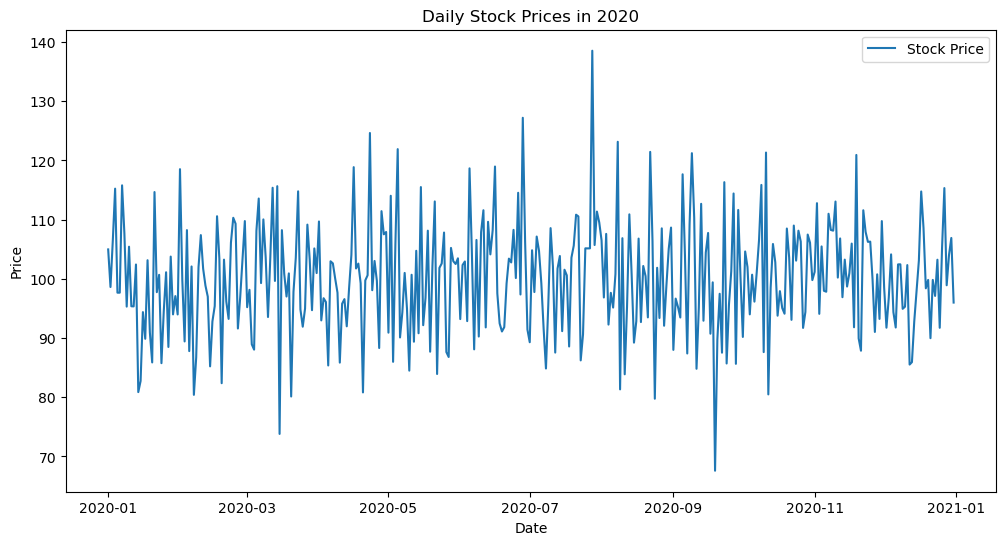

In [2]:
# Plot the stock prices
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['price'], label='Stock Price')
plt.title('Daily Stock Prices in 2020')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [3]:
# Calculate the 7-day rolling average
df['rolling_avg'] = df['price'].rolling(window=7).mean()

# Display the first few rows with the rolling average
df.head(10)


,date,price,rolling_avg
0,2020-01-01,104.967142,NaN
1,2020-01-02,98.617357,NaN
2,2020-01-03,106.476885,NaN
3,2020-01-04,115.230299,NaN
4,2020-01-05,97.658466,NaN
5,2020-01-06,97.658630,NaN
6,2020-01-07,115.792128,105.200130
7,2020-01-08,107.674347,105.586873
8,2020-01-09,95.305256,105.113716
9,2020-01-10,105.425600,104.963532


In [4]:
# Make predictions for the next 7 days using the last known rolling average
last_known_avg = df['rolling_avg'].iloc[-1]

# Create a DataFrame for the next 7 days
future_dates = pd.date_range(start='2021-01-01', end='2021-01-07', freq='D')
predictions = pd.DataFrame(future_dates, columns=['date'])
predictions['predicted_price'] = last_known_avg

# Display the predictions
predictions


,date,predicted_price
0,2021-01-01,102.581042
1,2021-01-02,102.581042
2,2021-01-03,102.581042
3,2021-01-04,102.581042
4,2021-01-05,102.581042
5,2021-01-06,102.581042
6,2021-01-07,102.581042


In [5]:
last_known_avg

102.58104225308398

In [6]:
# Simulate actual prices for the next 7 days
actual_prices = np.random.normal(100, 10, size=(len(future_dates),))
predictions['actual_price'] = actual_prices

# Calculate the error
predictions['error'] = predictions['actual_price'] - predictions['predicted_price']

# Display the predictions with actual prices and error
predictions


,date,predicted_price,actual_price,error
0,2021-01-01,102.581042,102.240925,-0.340117
1,2021-01-02,102.581042,100.125924,-2.455118
2,2021-01-03,102.581042,100.976761,-1.604281
3,2021-01-04,102.581042,92.269902,-10.311140
4,2021-01-05,102.581042,100.245102,-2.335941
5,2021-01-06,102.581042,104.979983,2.398941
6,2021-01-07,102.581042,114.511436,11.930394
